# Assignment-1 : Visualizing COVID-19 data

## **Task #1: covid c mortalities cumulative analysis**

**A. Replicate the two graphs we created in Section 2 and 3 for the column ’Deaths’. Pick N = 20 countries and start Day 0 at K = 10 deaths.**

**Section-2 Graph:**

Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

Loading the master cumulative table that was created in the first part of separate .ipynb file discussed in lecture.

In [2]:
covid_cumulative = pd.read_excel("/Users/AyeshaPatnaik/Downloads/UofT/Sem2_Winter-23/CHE1148/Assignment-1/Code generated files/covid_a_master_cumulative_table.xlsx")

In [3]:
#Reading the dataframe
covid_cumulative

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
0,0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...,...
38906,38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


Filtering the last day for every country and creating the pandas.DataFrame ’last_day_per_country’.

In [4]:
last_day_per_country = covid_cumulative.groupby(by=['Countries'])['Date'].max() # type(last_day_per_country) is pandas.Series
last_day_per_country = last_day_per_country.to_frame() # We convert it to pandas.DataFrame
last_day_per_country.reset_index(inplace=True) # And reset the index so that we can further join on 'Countries'

In [5]:
#Reading the dataframe last_day_per_country that contains the last day for every country
last_day_per_country

,Countries,Date
0,Afghanistan,2020-08-27
1,Albania,2020-08-27
2,Algeria,2020-08-27
3,Andorra,2020-08-27
4,Angola,2020-08-27
...,...,...
205,Vietnam,2020-08-27
206,Western_Sahara,2020-08-27
207,Yemen,2020-08-27
208,Zambia,2020-08-27


Defining the number of top countries I wish to plot (**N = 20**). Joining the dataframe ’covid_cumulative’ with ’last_day_per_country’ and sorting the values of ’Deaths’ in descending order. Slicing the top N countries and converting the country names to a list.

In [6]:
N = 20
last_day = pd.merge(covid_cumulative, last_day_per_country, how='inner', left_on = ['Countries', 'Date'], right_on = ['Countries', 'Date'])
last_day = last_day.sort_values('Deaths', ascending=False)
last_day
top_countries = last_day[:N]['Countries'].tolist()
top_countries #top N=20 countries as list

['USA',
 'Brazil',
 'Mexico',
 'India',
 'UK',
 'Italy',
 'France',
 'Spain',
 'Peru',
 'Iran',
 'Colombia',
 'Russia',
 'S.Africa',
 'Chile',
 'Belgium',
 'Germany',
 'Canada',
 'Argentina',
 'Indonesia',
 'Iraq']

Filtering rows in the dataframe ’covid_cumulative’ that contain values of the top N countries and more than **K = 10** confirmed deaths.

In [7]:
K = 10
covid_top_countries = covid_cumulative[covid_cumulative.Countries.isin(top_countries)]
covid_top_countries = covid_top_countries[covid_top_countries['Deaths'] > K] #More than K=10 deaths

In [8]:
#Reading the dataframe that contains top N countries with more than K deaths
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
3781,3781,61,12,2020-02-25,Iran,82913893.0,Asia
3848,3848,95,15,2020-02-26,Iran,82913893.0,Asia
3852,3852,322,11,2020-02-26,Italy,60359546.0,Europe
3915,3915,139,19,2020-02-27,Iran,82913893.0,Asia
3919,3919,400,12,2020-02-27,Italy,60359546.0,Europe
...,...,...,...,...,...,...,...
38854,38854,613378,28124,2020-08-27,Peru,32510462.0,America
38861,38861,970865,16683,2020-08-27,Russia,145872260.0,Europe
38863,38863,615701,13502,2020-08-27,S.Africa,58558267.0,Africa
38897,38897,328846,41465,2020-08-27,UK,66647112.0,Europe


Creating dataframe ’day_0_for_every_country’ that identifies Day 0 for each of the top N countries by applying groupby and min in the previously filtered dataframe.

In [9]:
temp_day_0_for_every_country = covid_top_countries.groupby(by=['Countries']).min()
temp_day_0_for_every_country = temp_day_0_for_every_country['Date']
day_0_for_every_country=temp_day_0_for_every_country.to_frame()

In [10]:
day_0_for_every_country

,Date
Countries,
Argentina,2020-03-27
Belgium,2020-03-15
Brazil,2020-03-21
Canada,2020-03-21
Chile,2020-04-01
Colombia,2020-03-31
France,2020-03-09
Germany,2020-03-16
India,2020-03-26


Merging it back with the original dataframe ’covid_top_countries’ and subtracting columns ’Date_x’ and ’Day_0’ to calculate the ’Days_from_0’.

In [11]:
covid_top_countries = covid_top_countries.merge(day_0_for_every_country, how='inner', on='Countries')
covid_top_countries.rename(columns = {'Date_y': 'Day_0'}, inplace = True)
covid_top_countries['Days_from_0'] = (covid_top_countries['Date_x'] - covid_top_countries['Day_0']).dt.days

covid_top_countries

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4
...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142


Generating the df ’max_deaths’ and saving it as ’covid_c_max_deaths.xlsx’. This df is helpful in labeling the graphs and contains the snapshot of the countries with statistics such as: Case fatality rate, Infection rate per 1 million, Mortality rate per 1 million.

In [12]:
max_deaths = covid_top_countries.groupby(by=['Countries']).max()
max_deaths['Case_fatality_rate'] = max_deaths['Deaths']/max_deaths['Cases']*100
max_deaths.sort_values('Deaths', ascending=False)
max_deaths['Infection_rate_per_1m'] = max_deaths['Cases']/max_deaths['Population']*1000000
max_deaths['Mortality_rate_per_1m'] = max_deaths['Deaths']/max_deaths['Population']*1000000
max_deaths.drop('Unnamed: 0', axis = 1, inplace = True)
max_deaths.to_excel('covid_b_max_deaths.xlsx')

In [13]:
max_deaths

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0,Case_fatality_rate,Infection_rate_per_1m,Mortality_rate_per_1m
Countries,,,,,,,,,,
Argentina,370175,7839,2020-08-27,4.478068e+07,America,2020-03-27,153,2.117647,8266.400629,175.053190
Belgium,82936,9879,2020-08-27,1.145552e+07,Europe,2020-03-15,165,11.911594,7239.829116,862.379086
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,3.165458,17612.719601,557.523185
Canada,126417,9094,2020-08-27,3.741104e+07,America,2020-03-21,159,7.193653,3379.136393,243.083338
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-04-01,148,2.731351,21230.701611,579.884957
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-31,149,3.177521,11368.222727,361.227676
France,253587,30544,2020-08-27,6.701288e+07,Europe,2020-03-09,171,12.044781,3784.152967,455.792956
Germany,237936,9285,2020-08-27,8.301921e+07,Europe,2020-03-16,164,3.902310,2866.035360,111.841581
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-26,154,1.826819,2422.563660,44.255865


Creating the dataframes: x1,..., x7 and y 1,..., y 7 that capture the doubling of deaths every 1, 2, 3 and 7 days. The simple formula is K × 2(days), where K is the number of deaths on the first day, which is 10 for this dataset.



In [14]:
x1 = np.array([0, 15])
x2 = np.array([0, 30])
x3 = np.array([0, 45])
x7 = np.array([0, 105])

y_1 = np.array([K, K*2**(x1[1])])
y_2 = np.array([K, K*2**(x2[1]/2)])
y_3 = np.array([K, K*2**(x3[1]/3)])
y_7 = np.array([K, K*2**(x7[1]/7)])

Using the Seaborn package (abbreviated as sns) to plot the lines of the countries deaths and the theoretical lines for the doubling of deaths.

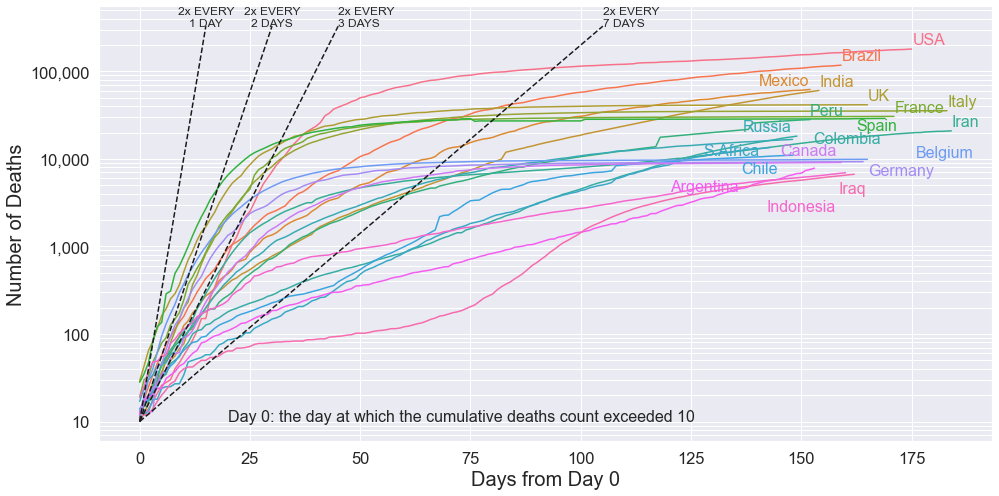

In [15]:
sns.set(rc={'figure.figsize':(16,8)}, font_scale = 1.5)
style = dict(size=10, color='gray')

ax = sns.lineplot(x="Days_from_0", y="Deaths", hue="Countries", data=covid_top_countries, markers=True, hue_order=top_countries, legend=False)
ax.set_yscale('log')
plt.grid(True, which='both')
ax.plot(x1, y_1, 'k--')
ax.plot(x2, y_2, 'k--')
ax.plot(x3, y_3, 'k--')
ax.plot(x7, y_7, 'k--')
ax.set_xlabel("Days from Day 0",fontsize=20)
ax.set_ylabel("Number of Deaths",fontsize=20)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.text(20, 10, 'Day 0: the day at which the cumulative deaths count exceeded {:.0f}'.format(K), fontsize=16)
plt.text(x1.max(), y_1.max(), '2x EVERY\n1 DAY', ha = 'center', fontsize=12)
plt.text(x2.max(), y_2.max(), '2x EVERY\n2 DAYS', ha = 'center', fontsize=12)
plt.text(x3.max(), y_3.max(), '2x EVERY\n3 DAYS', ha = 'left', fontsize=12)
plt.text(x7.max(), y_7.max(), '2x EVERY\n7 DAYS', ha = 'left', fontsize=12)
texts = [plt.text(max_deaths.loc[str(country)]['Days_from_0'], max_deaths.loc[str(country)]['Deaths'], str(country), fontsize=16, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

plt.savefig('Fig_1_1_Patnaik_Ayesha.png')

From the above graph we see that the cumulative death counts increase for almost every country from Day 0. Among the countries, USA,Brazil,Mexico, India and UK seem to be the top 5 countries with faster and higher number of deaths over the time.

**Section-3 Graph:**

We use a for loop to iterate through every country in the ’top countries’ and calculate the moving slope of the previous 7 days.

In [16]:
#For the next code cell, warning for .append method for this panda version was displayed and it suggested to use .concat instead. I am noting the suggestion but choosing to use .append for this assignment. Hence turning off the display of the warning.
import warnings
warnings.filterwarnings('ignore')

In [17]:
back_calc = 7
slope_df = pd.DataFrame(columns=['Countries', 'Days_from_0', 'Slope', 'R2', 'P_value'])

for country in top_countries:
    one_country_data = covid_top_countries[covid_top_countries['Countries'] == str(country)].reset_index(drop=True)

    for i in np.arange(back_calc, len(one_country_data)+1):
        x = one_country_data.loc[i-back_calc: i, 'Days_from_0'] 
        y = one_country_data.loc[i-back_calc: i, 'Deaths']  
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_country_data.loc[i-1, 'Slope'] = slope
        one_country_data.loc[i-1, 'R2'] = r_value * r_value
        one_country_data.loc[i-1, 'P_value'] = p_value
        one_country = one_country_data[['Countries', 'Days_from_0', 'Slope', 'R2', 'P_value']]
    
    slope_df = slope_df.append(one_country, ignore_index=False)
    


In [18]:
slope_df.head(15)

,Countries,Days_from_0,Slope,R2,P_value
0,USA,0,NaN,NaN,NaN
1,USA,1,NaN,NaN,NaN
2,USA,2,NaN,NaN,NaN
3,USA,3,NaN,NaN,NaN
4,USA,4,NaN,NaN,NaN
5,USA,5,NaN,NaN,NaN
6,USA,6,3.011905,0.974751,0.000005
7,USA,7,3.738095,0.958956,0.000022
8,USA,8,4.464286,0.952415,0.000034
9,USA,9,5.404762,0.941221,0.000065


 Setting ’Countries’ as the index and saving the file: covid_c_slope_daily.xlsx

In [19]:
slope_df.set_index('Countries', drop=False, inplace=True)
slope_df.to_excel('covid_c_slope_daily.xlsx')

Creating the df max_slope with the maximum slope value per country and sorting them in descending order. This way, we then filter appropriately to create the 4 dataframes data_1_5, data_6_10, data_11_15 and data_16_20 to plot them in the 4 subplots below.

In [20]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Countries']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Countries'] = max_slope.index

data_1_5 = slope_df[slope_df.Countries.isin(max_slope[:5]['Countries'].tolist())]
countries_1_5 = max_slope[:5]['Countries'].tolist()
data_6_10 = slope_df[slope_df.Countries.isin(max_slope[5:10]['Countries'].tolist())]
countries_6_10 = max_slope[5:10]['Countries'].tolist()
data_11_15 = slope_df[slope_df.Countries.isin(max_slope[10:15]['Countries'].tolist())]
countries_11_15 = max_slope[10:15]['Countries'].tolist()
data_16_20 = slope_df[slope_df.Countries.isin(max_slope[15:20]['Countries'].tolist())]
countries_16_20 = max_slope[15:20]['Countries'].tolist()
max_slope

,Days_from_0,Slope,R2,P_value,Countries
Countries,,,,,
USA,175,2876.345238,0.998196,0.001091,USA
Brazil,159,1152.630952,0.997301,0.000060,Brazil
France,171,1010.666667,0.998144,0.019353,France
UK,165,977.142857,0.996646,0.000400,UK
India,154,971.190476,0.999857,0.000778,India
Peru,152,922.119048,0.999988,0.030433,Peru
Spain,169,872.214286,0.999424,1.000000,Spain
Italy,183,821.571429,0.999744,0.045427,Italy
Mexico,152,802.785714,0.996012,0.000237,Mexico


In [21]:
#Reindexing the dataframes to avoid duplicate indices during plotting

data_1_5.reset_index(inplace=True)
data_6_10.reset_index(inplace=True)
data_11_15.reset_index(inplace=True)
data_16_20.reset_index(inplace=True)

Using Seaborn’s lineplot and plotting the 4 dataframes with the top 20 countries in a 2×2 subplots image. Using the package adjust texts to annotate the lines and linear scale in y-axis.

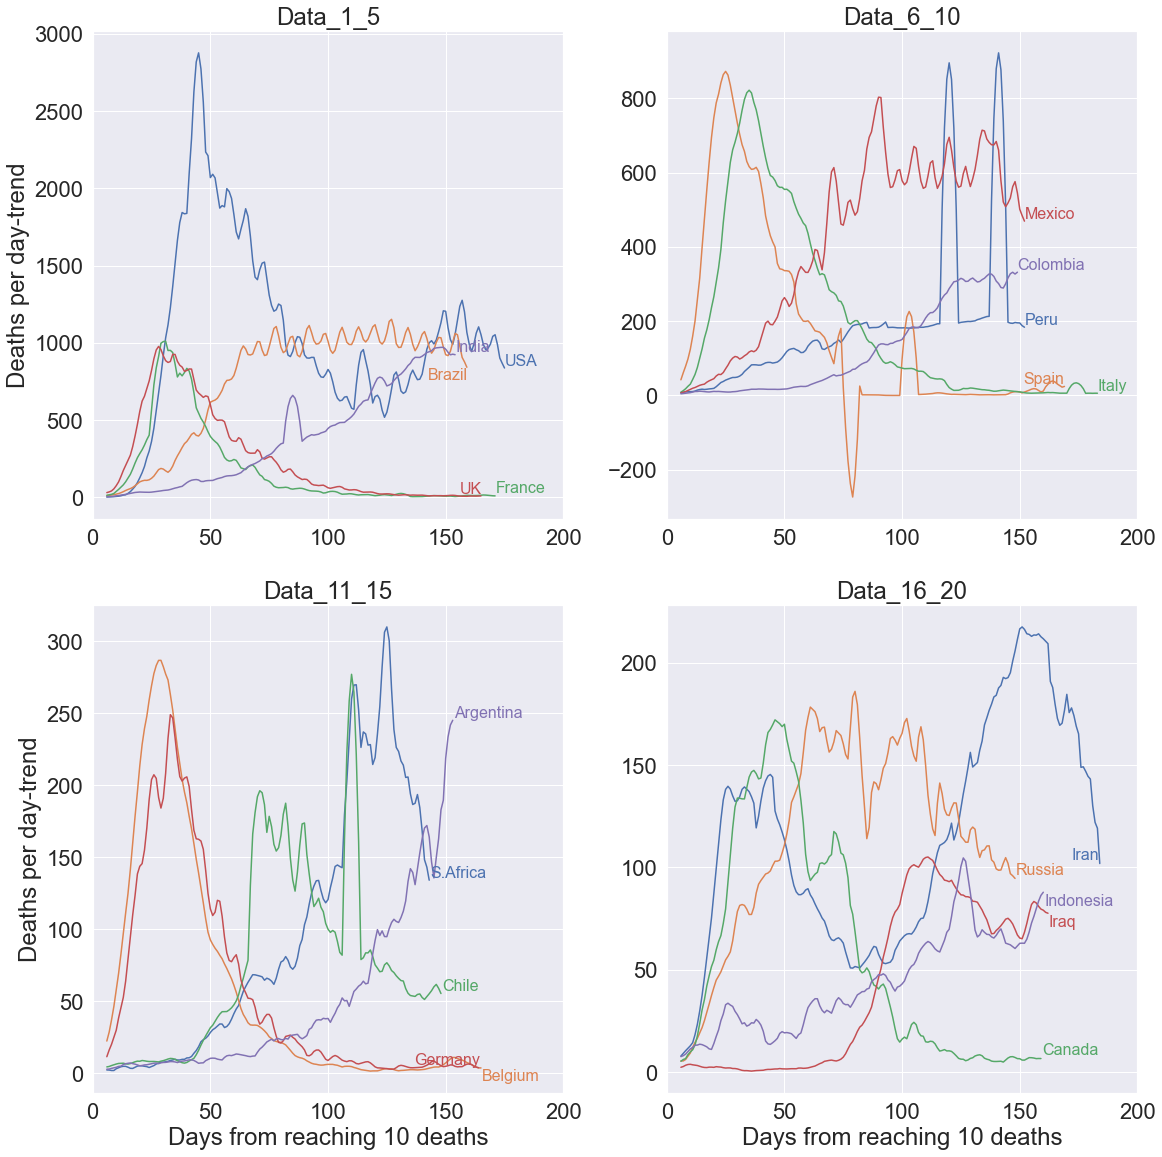

In [22]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
fig.tight_layout(h_pad = 2, w_pad=2)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_1_5, markers=True, hue_order=countries_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 0].get_lines()[countries_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Deaths per day-trend",fontsize=24)
axes[0, 0].set_title("Data_1_5")

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_6_10, markers=True, hue_order=countries_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 1].get_lines()[countries_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in countries_6_10]
adjust_text(texts)
axes[0, 1].set_title("Data_6_10")

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_11_15, markers=True, hue_order=countries_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 0].get_lines()[countries_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Deaths per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching 10 deaths",fontsize=24)
axes[1, 0].set_title("Data_11_15")

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_16_20, markers=True, hue_order=countries_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 1].get_lines()[countries_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 10 deaths",fontsize=24)
axes[1, 1].set_title("Data_16_20")

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])

plt.savefig('Fig_1_2_Patnaik_Ayesha.png',bbox_inches = 'tight')

**B.
Create the df max slope with the maximum slope value per country and sort them in descending order. This way, we then filter appropriately to create the 4 dataframes data 1 5, data 6 10, data 11 15 and data 16 20 to plot them in the 4 subplots below.
Use Seaborn’s lineplot and plot the 4 dataframes with the top 20 countries in a 2×2 subplots image. Use the package adjust texts to annotate the lines and linear scale in y-axis.
Task #1: covid c mortalities cumulative analysis
Replicate the two graphs we created in Section 2 and 3 for the column ’Deaths’. Pick N = 20 countries and start Day 0 at K = 10 deaths.
A term that people started studying after the first few months of the pandemic is that of excess deaths. Excess deaths are the additional deaths to the typical death rate that are due to Covid-19. E.g. if the typical death rate for a country is 1000 deaths/day, and the Covid-19 deaths for a day is 500, then the excess death rate is 50%. You should see 1500 deaths/day in that country if the Covid-related deaths are independent of the expected deaths (this is not the case).
To calculate the excess deaths, you need an estimate of the typical death rate per country. Use the table ’Death rate crude per 1000 people.xls’ with the code below to import and make some changes in the dataframe (the data set is downloaded from the World Bank Data).**

In [23]:
death_rate = pd.read_excel("/Users/AyeshaPatnaik/Downloads/UofT/Sem2_Winter-23/CHE1148/Assignment-1/Death_rate_crude_per_1000_people.xls",
                          sheet_name="Data",
                          header=3,
                          index_col=0)\
                          .drop(columns=["Country Code","Indicator Name","Indicator Code"])

In [24]:
death_rate=death_rate.ffill(axis=1).iloc[:,-1]
death_rate=death_rate.to_frame(name="Death rate per 1000")
death_rate["Countries"]=death_rate.index
death_rate.replace("United States","USA",inplace=True)
death_rate.replace("United Kingdom","UK",inplace=True)
death_rate.replace("Korea, Rep.","S.Korea", inplace=True)
death_rate.replace("Iran, Islamic Rep.","Iran", inplace=True)
death_rate.replace("Saudi Arabia", "S.Arabia",inplace=True)
death_rate.replace("South Africa", "S.Africa",inplace=True)

In [25]:
death_rate

,Death rate per 1000,Countries
Country Name,,
Aruba,8.907,Aruba
Afghanistan,6.575,Afghanistan
Angola,8.432,Angola
Albania,7.714,Albania
Andorra,4.300,Andorra
...,...,...
Kosovo,7.000,Kosovo
"Yemen, Rep.",5.978,"Yemen, Rep."
South Africa,9.498,S.Africa


In [26]:
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4
...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142


Merging dataframe "death_rate" with covid_top_countries" on "Countries" to make sure that the main table has all the information we need. Main table in my case is covid_top_countries now.

In [27]:
covid_top_countries=covid_top_countries.merge(death_rate, how='left', on='Countries')


In [28]:
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Death rate per 1000
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0,4.835
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1,4.835
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2,4.835
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3,4.835
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4,4.835
...,...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139,9.498
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140,9.498
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141,9.498
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142,9.498


Converting annnual average death per 1000 people to daily typical deaths 

In [29]:
covid_top_countries["Typical_deaths_per_day"] = (covid_top_countries["Death rate per 1000"]*covid_top_countries["Population"])/(1000*365)

Calculating the typical cumulative deaths and the excess deaths rate as the ratio of the cumulative deaths over the typical cumulative deaths expressed as %, with the help of the following code:


In [30]:
covid_top_countries["Typical_cumulative_deaths"] = (covid_top_countries["Days_from_0"] + 1)* covid_top_countries["Typical_deaths_per_day"]
covid_top_countries["Excess_death_rate"] = covid_top_countries["Deaths"] / covid_top_countries["Typical_cumulative_deaths"] * 100

In [31]:
covid_top_countries.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
covid_top_countries

,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
0,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0,4.835,1098.325131,1098.325131,1.092573
1,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1,4.835,1098.325131,2196.650261,0.682858
2,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2,4.835,1098.325131,3294.975392,0.576636
3,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3,4.835,1098.325131,4393.300522,0.591810
4,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4,4.835,1098.325131,5491.625653,0.619125
...,...,...,...,...,...,...,...,...,...,...,...,...
3230,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139,9.498,1523.798411,213331.777521,6.087701
3231,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140,9.498,1523.798411,214855.575932,6.078036
3232,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141,9.498,1523.798411,216379.374343,6.081448
3233,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142,9.498,1523.798411,217903.172754,6.107300


In [32]:
max_death_rate = covid_top_countries.groupby(by=['Countries']).max()
#max_death_rate.sort_values('Excess_death_rate', ascending=False)
max_death_rate

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
Countries,,,,,,,,,,,
Argentina,370175,7839,2020-08-27,4.478068e+07,America,2020-03-27,153,7.616,934.382523,1.438949e+05,5.447726
Belgium,82936,9879,2020-08-27,1.145552e+07,Europe,2020-03-15,165,9.600,301.295842,5.001511e+04,56.547412
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,6.378,3687.873513,5.900598e+05,19.941200
Canada,126417,9094,2020-08-27,3.741104e+07,America,2020-03-21,159,7.500,768.719959,1.229952e+05,12.999728
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-04-01,148,6.076,315.486479,4.700749e+04,24.476592
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-31,149,5.503,758.953301,1.138430e+05,15.972876
France,253587,30544,2020-08-27,6.701288e+07,Europe,2020-03-09,171,9.000,1652.372458,2.842081e+05,28.142643
Germany,237936,9285,2020-08-27,8.301921e+07,Europe,2020-03-16,164,11.300,2570.183855,4.240803e+05,5.365127
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-26,154,7.210,26991.430194,4.183672e+06,1.445429


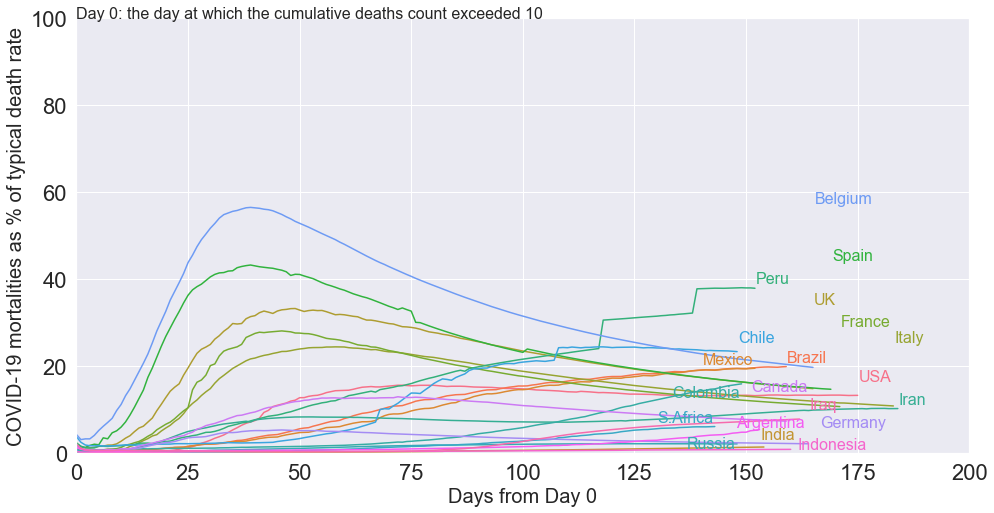

In [33]:
sns.set(rc={'figure.figsize':(16,8)}, font_scale = 2)
style = dict(size=10, color='gray')

ax = sns.lineplot(x="Days_from_0", y="Excess_death_rate", hue="Countries", data=covid_top_countries, markers=True, hue_order=top_countries, legend=False)
ax.set_yscale('linear')
plt.grid(True, which='both')

ax.set_xlabel("Days from Day 0",fontsize=20)
ax.set_ylabel("COVID-19 mortalities as % of typical death rate",fontsize=20)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.text(0, 100, 'Day 0: the day at which the cumulative deaths count exceeded {:.0f}'.format(K), fontsize=16)
plt.xlim([0, 200])
plt.ylim([0, 100])

texts = [plt.text(max_death_rate.loc[str(country)]['Days_from_0'], max_death_rate.loc[str(country)]['Excess_death_rate'], str(country), fontsize=16, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

plt.savefig('Fig_1_3_Patnaik_Ayesha.png')